In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr

In [2]:
orig_file = '/g/data/xv83/dbi599/agcd/data/agcd_v1_precip_total_r005_daily_1900-2020.zarr.zip'
orig_ds = xr.open_zarr(orig_file)

In [3]:
orig_ds

<xarray.Dataset>
Dimensions:    (lat: 691, nv: 2, lon: 886, time: 43981)
Coordinates:
  * lat        (lat) float32 -44.5 -44.45 -44.4 -44.35 ... -10.1 -10.05 -10.0
  * lon        (lon) float32 112.0 112.1 112.1 112.2 ... 156.1 156.1 156.2 156.2
  * time       (time) datetime64[ns] 1900-01-01T09:00:00 ... 2020-05-31T09:00:00
Dimensions without coordinates: nv
Data variables:
    crs        int32 ...
    lat_bnds   (lat, nv) float32 dask.array<chunksize=(691, 2), meta=np.ndarray>
    lon_bnds   (lon, nv) float32 dask.array<chunksize=(886, 2), meta=np.ndarray>
    precip     (time, lat, lon) float32 dask.array<chunksize=(50, 691, 886), meta=np.ndarray>
    time_bnds  (time, nv) datetime64[ns] dask.array<chunksize=(21991, 1), meta=np.ndarray>
Attributes: (12/33)
    Conventions:               CF-1.6, ACDD-1.3
    acknowledgment:            The Australian Government, Bureau of Meteorolo...
    agcd_version:              AGCD (AWAP) v1.0.0 Snapshot (1900-01-01 to 202...
    analysis_components:       total: the gridded accumulation of rainfall.
    attribution:               Data should be cited as : Australian Bureau of...
    cdm_data_type:             Grid
    ...                        ...
    summary:                   The daily and monthly rainfall data represents...
    time_coverage_end:         1900-12-31T00:00:00
    time_coverage_start:       1899-12-31T09:00:00
    title:                     Interpolated Rain Gauge Precipitation
    url:                       http://www.bom.gov.au/climate/
    uuid:                      14333ae2-28fe-4cb6-9f00-677adc94f25e

In [4]:
remapped_file = '/g/data/xv83/dbi599/agcd/data/agcd_v1_precip_total_cafe-grid_daily_1900-2020.zarr.zip'
remapped_ds = xr.open_zarr(remapped_file)

In [5]:
remapped_ds

<xarray.Dataset>
Dimensions:    (lat: 17, nv: 2, lon: 17, time: 43981)
Coordinates:
  * lat        (lat) float64 -43.48 -41.46 -39.44 ... -15.17 -13.15 -11.12
    lat_bnds   (lat, nv) float64 dask.array<chunksize=(17, 2), meta=np.ndarray>
  * lon        (lon) float64 113.8 116.2 118.8 121.2 ... 146.2 148.8 151.2 153.8
    lon_bnds   (lon, nv) float64 dask.array<chunksize=(17, 2), meta=np.ndarray>
  * time       (time) datetime64[ns] 1900-01-01T09:00:00 ... 2020-05-31T09:00:00
    time_bnds  (time, nv) datetime64[ns] dask.array<chunksize=(21991, 1), meta=np.ndarray>
Dimensions without coordinates: nv
Data variables:
    precip     (time, lat, lon) float64 dask.array<chunksize=(50, 17, 17), meta=np.ndarray>
Attributes: (12/29)
    Conventions:               CF-1.6, ACDD-1.3
    acknowledgment:            The Australian Government, Bureau of Meteorolo...
    agcd_version:              AGCD (AWAP) v1.0.0 Snapshot (1900-01-01 to 202...
    analysis_components:       total: the gridded accumulation of rainfall.
    attribution:               Data should be cited as : Australian Bureau of...
    cdm_data_type:             Grid
    ...                        ...
    summary:                   The daily and monthly rainfall data represents...
    time_coverage_end:         1900-12-31T00:00:00
    time_coverage_start:       1899-12-31T09:00:00
    title:                     Interpolated Rain Gauge Precipitation
    url:                       http://www.bom.gov.au/climate/
    uuid:                      14333ae2-28fe-4cb6-9f00-677adc94f25e

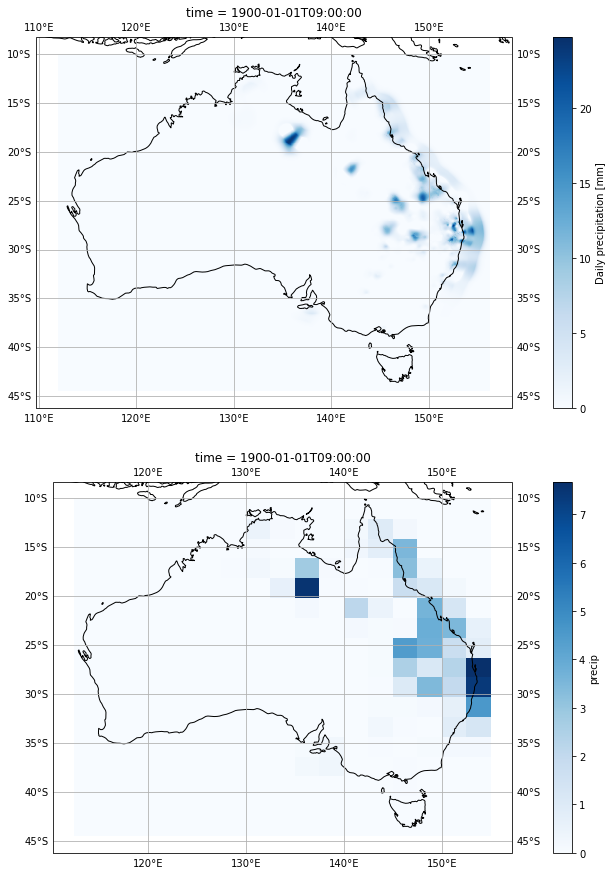

In [14]:
fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(211, projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(212, projection=ccrs.PlateCarree())

ax1.coastlines()
ax2.coastlines()

orig_ds['precip'].isel(time=0).plot(ax=ax1, cmap='Blues', transform=ccrs.PlateCarree())
remapped_ds['precip'].isel(time=0).plot(ax=ax2, cmap='Blues', transform=ccrs.PlateCarree())

ax1.gridlines(draw_labels=True)
ax2.gridlines(draw_labels=True)

plt.show()